Зображення успішно завантажено


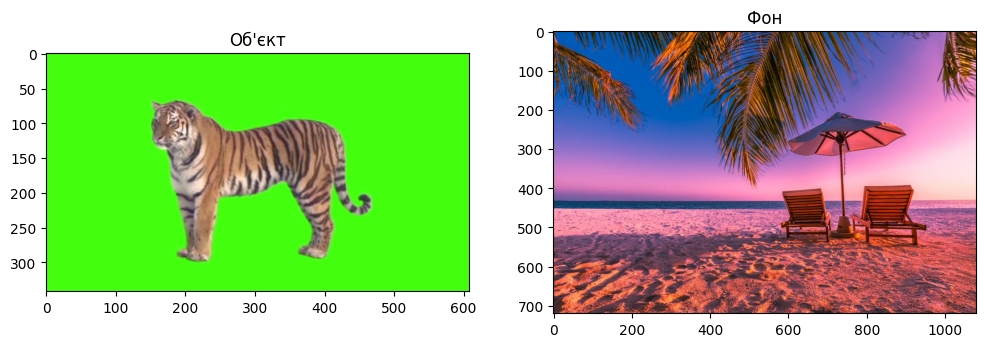

In [1]:
import numpy as np
import matplotlib.pyplot as plt

try:
    img_object_raw = plt.imread('tiger.jpg')
    img_background_raw = plt.imread('fonnew.jpg')
    print("Зображення успішно завантажено")
except FileNotFoundError:
    print("Помилка: Один або обидва файли не знайдено.")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img_object_raw)
axes[0].set_title("Об'єкт")
axes[0].axis()

axes[1].imshow(img_background_raw)
axes[1].set_title("Фон")
axes[1].axis()

plt.show()

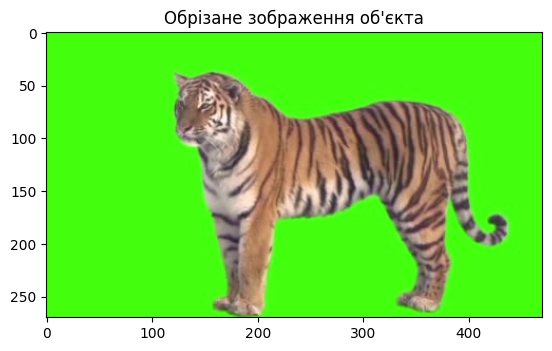

In [2]:
img_object = img_object_raw[30:300, 30:500, :]

plt.imshow(img_object)
plt.title("Обрізане зображення об'єкта")
plt.axis()
plt.show()

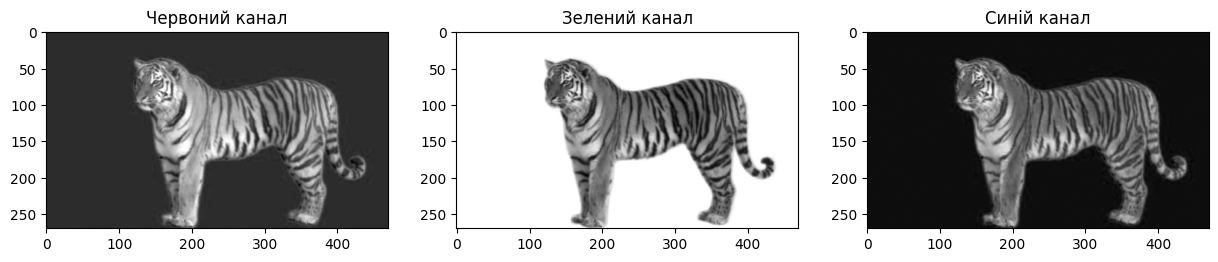

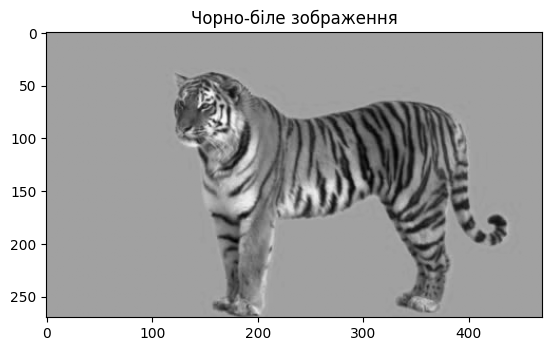

In [3]:
img_red = img_object[:, :, 0]
img_green = img_object[:, :, 1]
img_blue = img_object[:, :, 2]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img_red, cmap='gray')
axes[0].set_title("Червоний канал")
axes[0].axis()

axes[1].imshow(img_green, cmap='gray')
axes[1].set_title("Зелений канал")
axes[1].axis()

axes[2].imshow(img_blue, cmap='gray')
axes[2].set_title("Синій канал")
axes[2].axis()

plt.show()

img_gray = (0.299 * img_red + 0.587 * img_green + 0.114 * img_blue).astype(np.uint8)

plt.imshow(img_gray, cmap='gray')
plt.title("Чорно-біле зображення")
plt.axis()
plt.show()

Знайдений поріг методом Отсу: 185


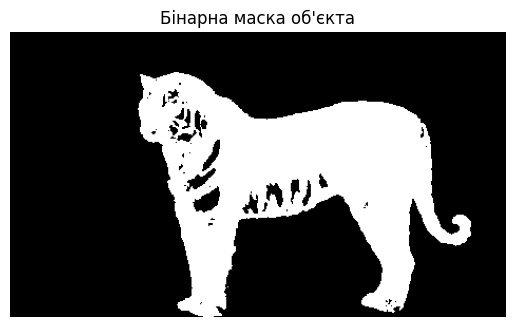

In [4]:
def otsu_threshold_manual(image_channel):
    pixel_counts, _ = np.histogram(image_channel.ravel(), bins=256, range=(0, 256))
    total_pixels = image_channel.size
    pixel_probabilities = pixel_counts / total_pixels

    best_threshold = 0
    max_variance = 0.0

    for t in range(1, 256):
        w_bg = np.sum(pixel_probabilities[:t])
        if w_bg == 0: continue
        mean_bg = np.sum(np.arange(t) * pixel_probabilities[:t]) / w_bg

        w_fg = np.sum(pixel_probabilities[t:])
        if w_fg == 0: continue
        mean_fg = np.sum(np.arange(t, 256) * pixel_probabilities[t:]) / w_fg

        between_class_variance = w_bg * w_fg * ((mean_bg - mean_fg) ** 2)

        if between_class_variance > max_variance:
            max_variance = between_class_variance
            best_threshold = t
            
    return best_threshold

otsu_thresh = otsu_threshold_manual(img_green)

binary_mask = img_green < otsu_thresh

print(f"Знайдений поріг методом Отсу: {otsu_thresh}")

plt.imshow(binary_mask, cmap='gray')
plt.title("Бінарна маска об'єкта")
plt.axis('off')
plt.show()

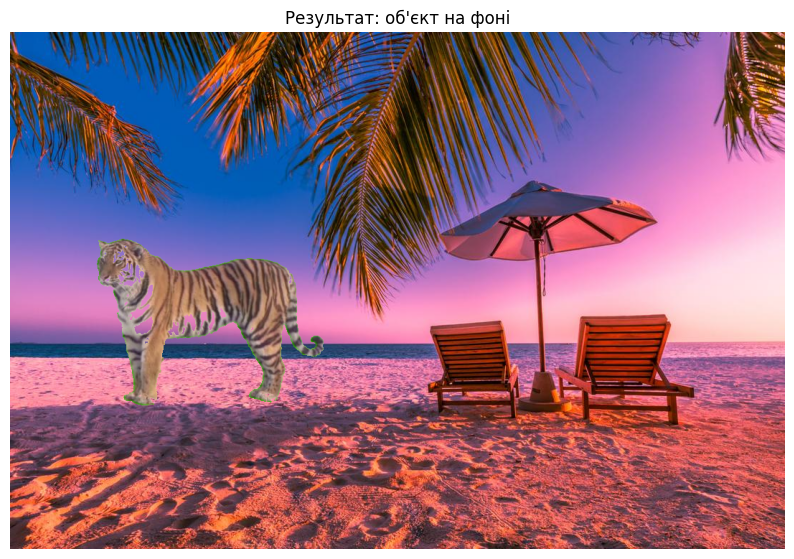

In [5]:
h, w, _ = img_object.shape 

final_image = np.copy(img_background_raw)

vertical_offset_pixels = 250 
horizontal_offset_pixels = 0 

y_start = vertical_offset_pixels
y_end = y_start + h

x_start = horizontal_offset_pixels
x_end = x_start + w

if y_end > final_image.shape[0] or x_end > final_image.shape[1]:
    print("Помилка: Об'єкт завеликий або розміщений занадто низько/вправо і виходить за межі фону.")
    sys.exit(1)

background_roi = final_image[y_start:y_end, x_start:x_end, :]

mask_3d = np.stack([binary_mask] * 3, axis=-1)

combined_roi = np.where(mask_3d, img_object, background_roi)

final_image[y_start:y_end, x_start:x_end, :] = combined_roi

plt.figure(figsize=(10, 8))
plt.imshow(final_image)
plt.title("Результат: об'єкт на фоні")
plt.axis('off')
plt.show()